In [10]:
%load_ext autoreload
%autoreload 2

# Standard libraries
import sys
import time

# Third party libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from sklearn.neighbors import KernelDensity
import SimpleITK as sitk

# Our libraries
sys.path.append('../../')
from gui.gui_shared import auto_contrast
from cell import Cell
import section
from section import Section

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def readTifWrapper(i, file_name):
    """
    i - index for parallel processing
    file_name - file name to open
    """
    image = readTifSection(str(file_name))
    return [i, image]


def readTifSection(file_path):
    """
    Read tif section image using SITK
    """
    image = sitk.ReadImage(str(file_path))
    image = sitk.GetArrayFromImage(image)
    image[image < 0] = 0
    image = image.T
    image = np.flip(image, axis=0)
    image = np.flip(image, axis=1)
    image  = np.squeeze(image)
    return image


def show_crop(img, points=None, x_crop=[6100, 7600], y_crop=[2450, 3300], 
              title="Image", cmap='gray', colorbar=False):
    """
    Show the crop of the image
    """
    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap=cmap)
    if points is not None:
        for point in points:
            plt.plot(point[1], point[0], 'ro', markersize=1)
    plt.title(title)
    if x_crop is not None:
        plt.xlim(x_crop)
    if y_crop is not None:
        plt.ylim(y_crop[::-1])
    if colorbar:
        plt.colorbar()
    plt.show()
    

Brain shape: (8716, 11236)
Ground truth (section 140) shape: (66, 2)


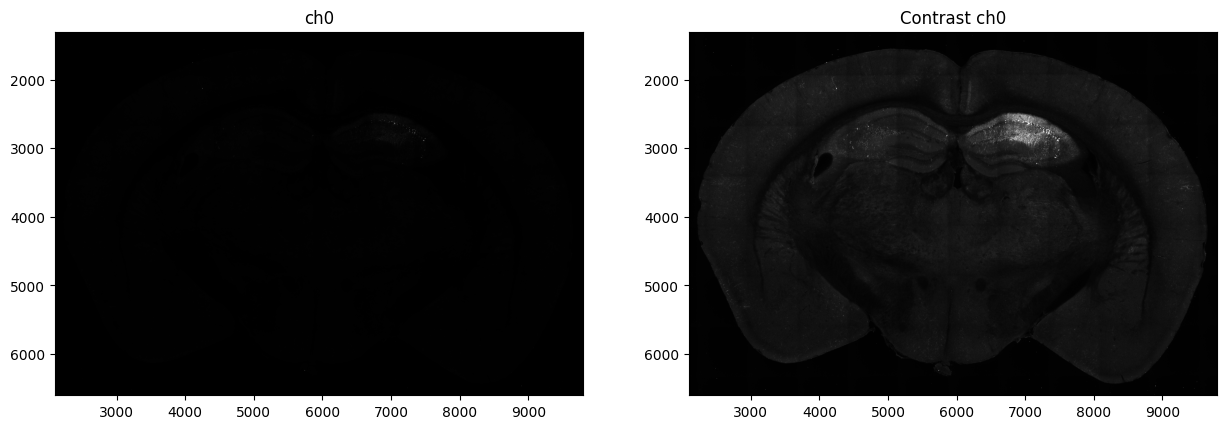

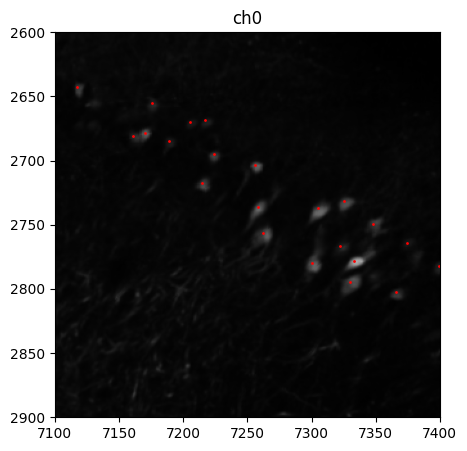

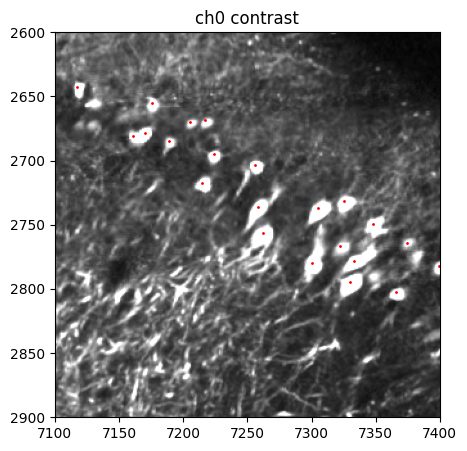

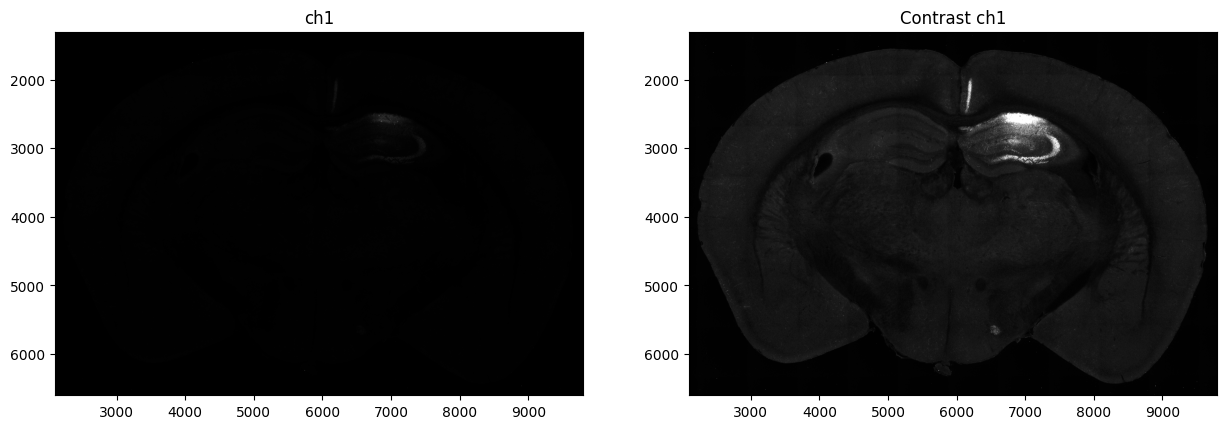

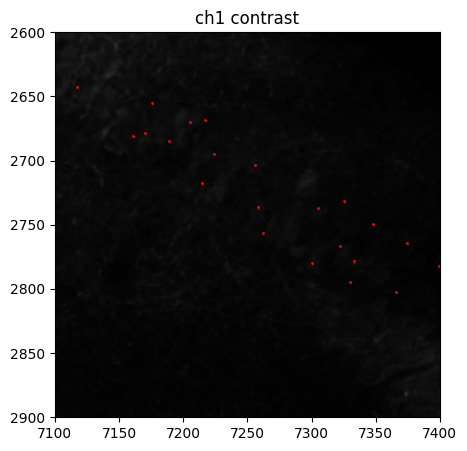

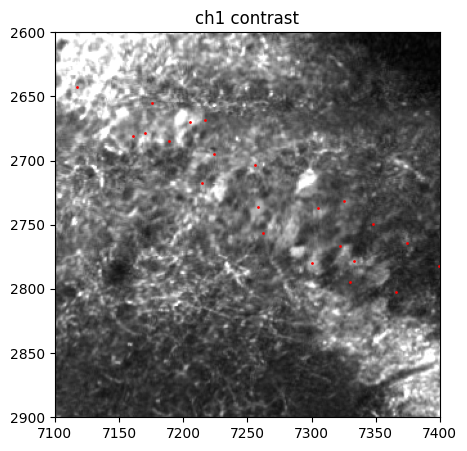

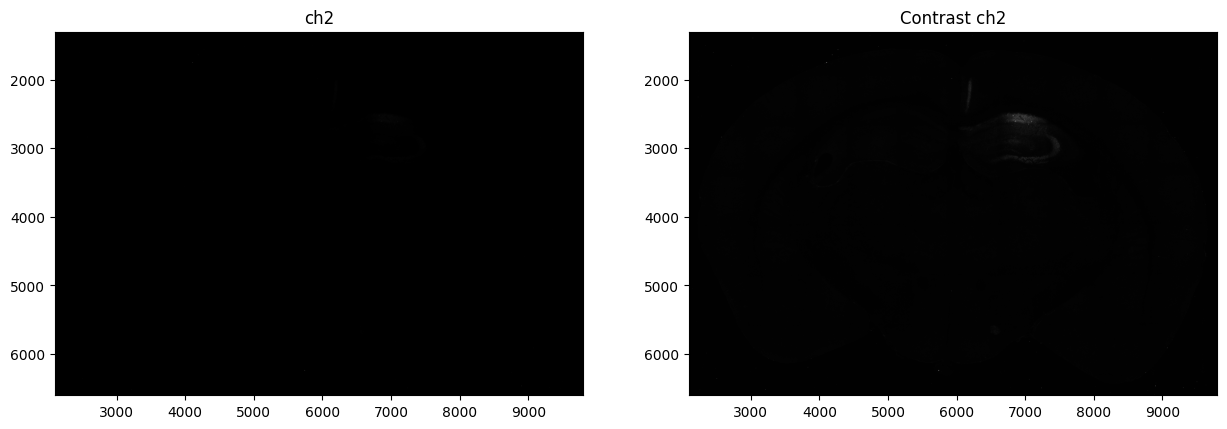

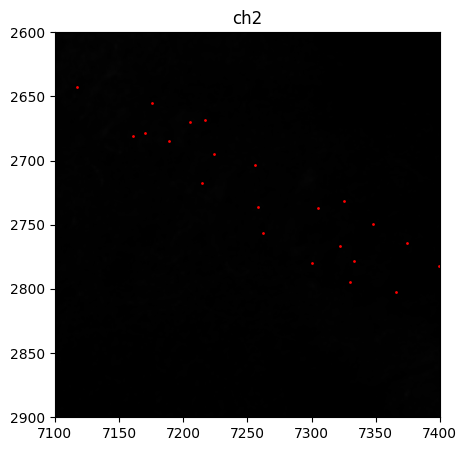

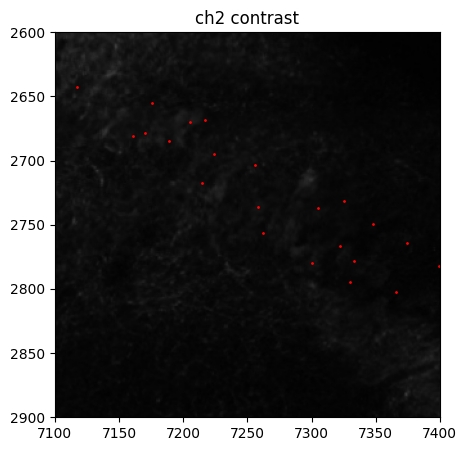

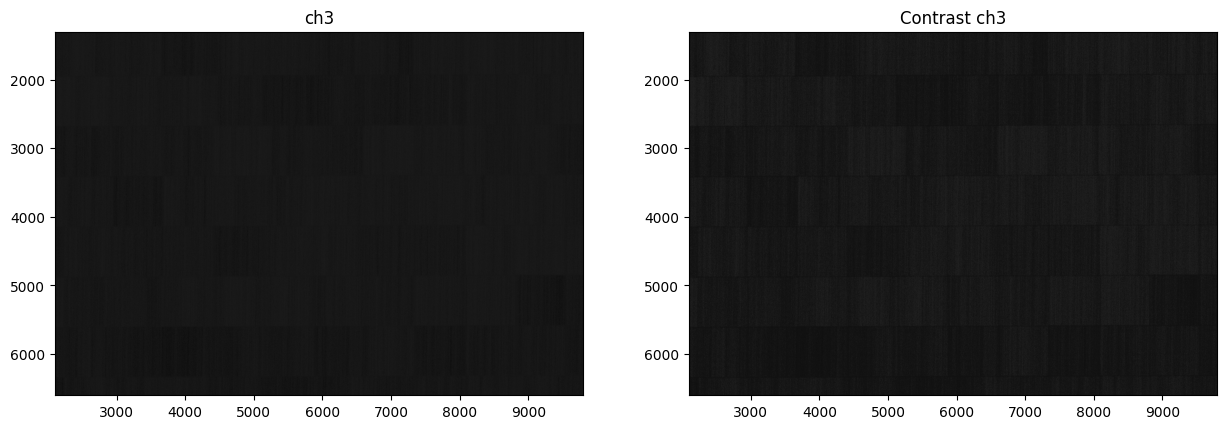

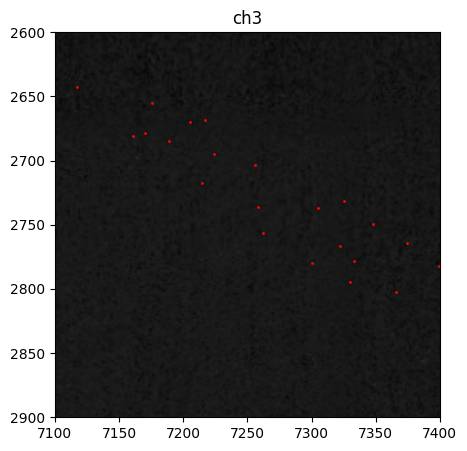

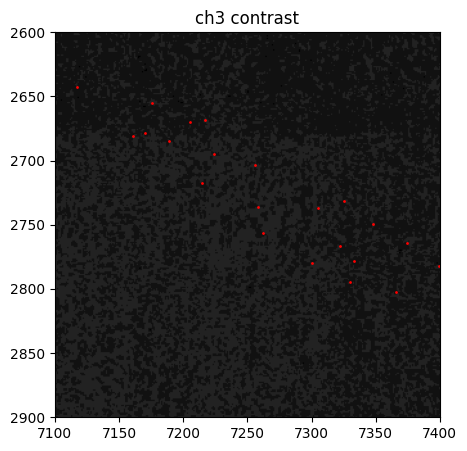

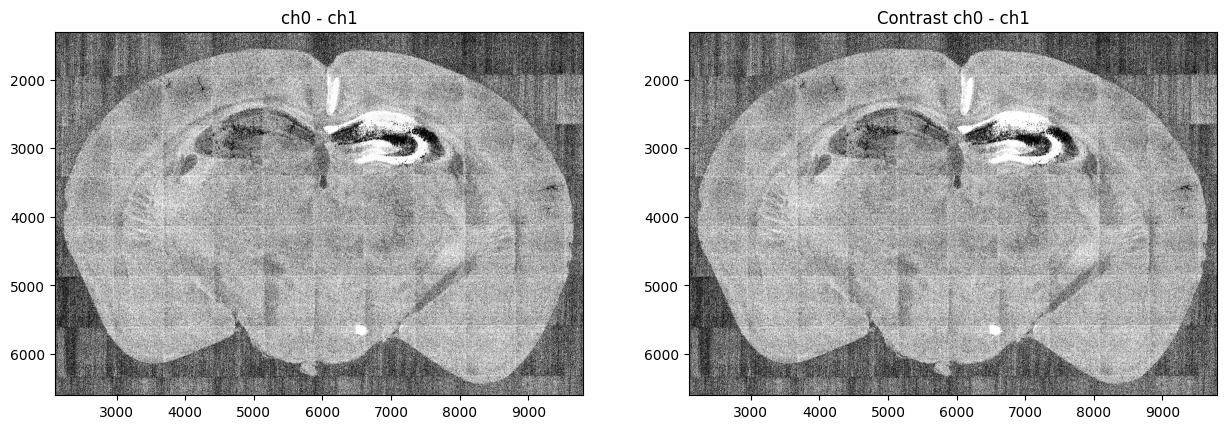

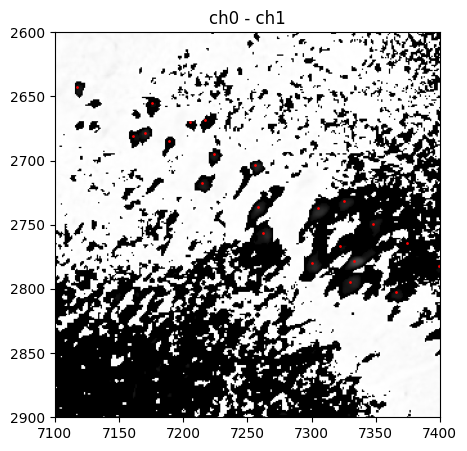

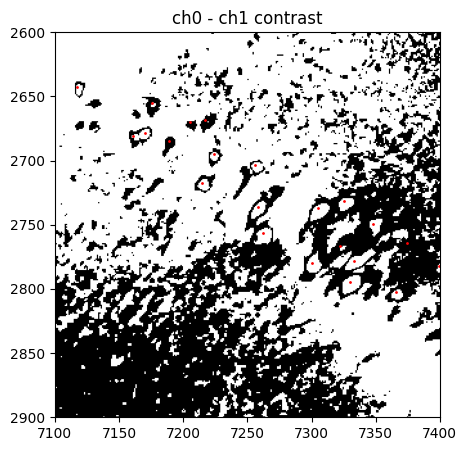

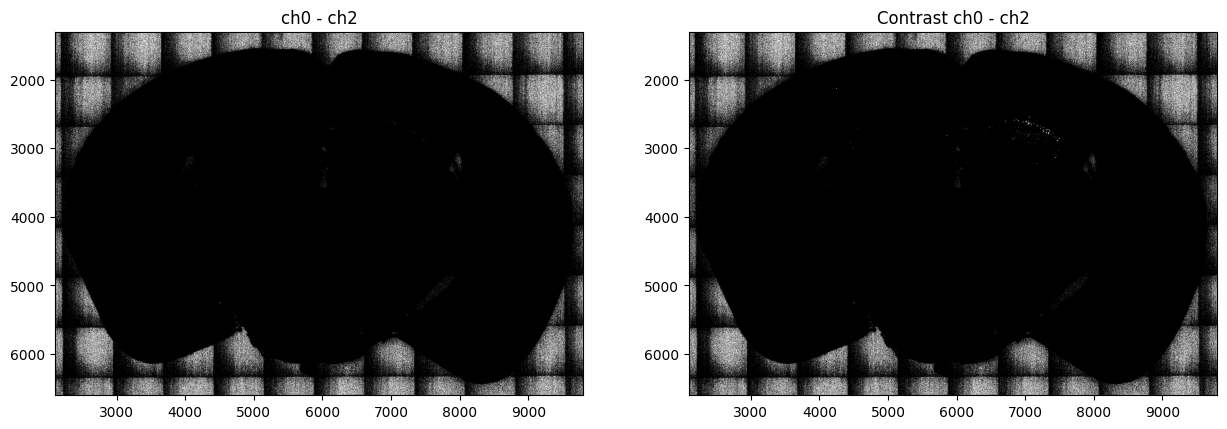

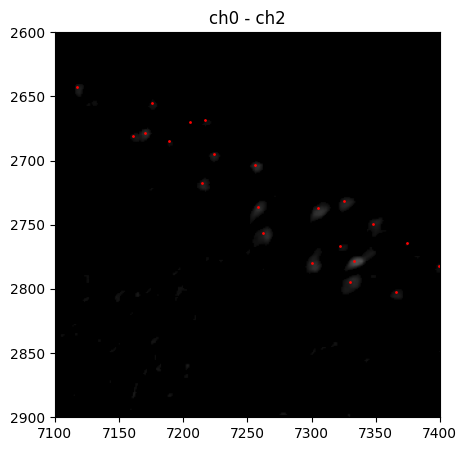

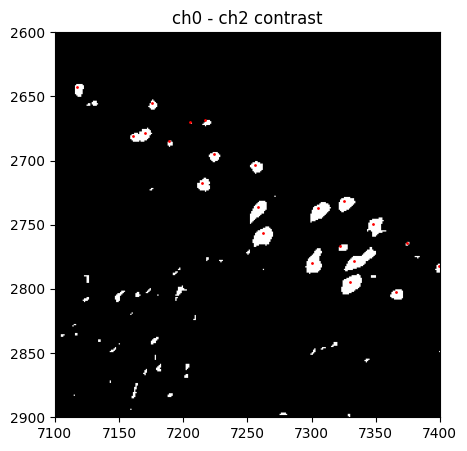

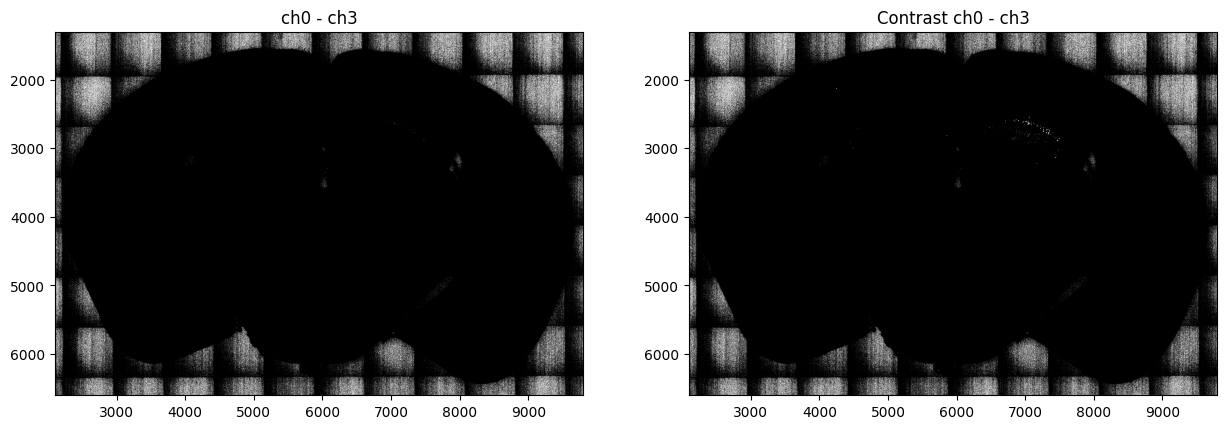

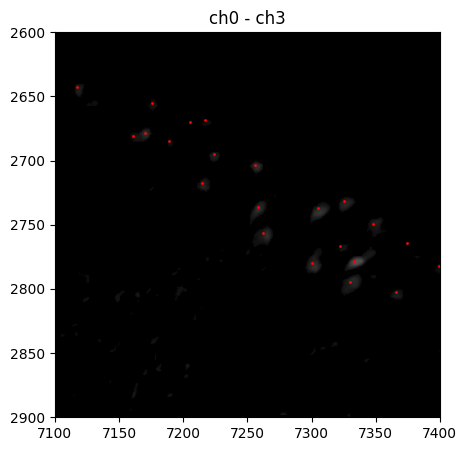

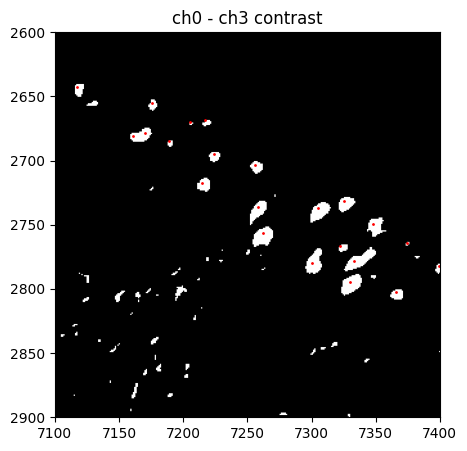

In [23]:
# Parameters for loading in the data
ch0_path = "/media/data/u01/B0039/stitched_ch0/230628_B0039_PG_U01_280-0140_1_0.tif"
ch1_path = "/media/data/u01/B0039/stitched_ch1/230628_B0039_PG_U01_280-0140_1_1.tif"
ch2_path = "/media/data/u01/B0039/stitched_ch2/230628_B0039_PG_U01_280-0140_1_2.tif"
ch3_path = "/media/data/u01/B0039/stitched_ch3/230628_B0039_PG_U01_280-0140_1_3.tif"
gt140_path = "/media/data/u01/B0039/red_section140_counts_240930_PG/red_section140_counts_240930_PG.txt"

# Load in the images
ch0 = readTifSection(ch0_path)
ch1 = readTifSection(ch1_path)
ch2 = readTifSection(ch2_path)
ch3 = readTifSection(ch3_path)
img = ch0

print("Brain shape:", img.shape)

gt_points = np.loadtxt(gt140_path, skiprows=2)
gt_points = gt_points[:, 1:]  # Remove section index row
print("Ground truth (section 140) shape:", gt_points.shape)

# Contrast section
contrast_img = auto_contrast(img, alpha=0.1)
contrast_ch1 = auto_contrast(ch1, alpha=0.1)
contrast_ch2 = auto_contrast(ch2, alpha=0.1)
contrast_ch3 = auto_contrast(ch3, alpha=0.1)


# Plot the image and contrast image
x_boundary = (2100, 9800)  # Crop out most of the background
y_boundary = (1300, 6600)
x_dca1_boundary = (6100, 7600)  # Crop the section to the region of interest
y_dca1_boundary = (2450, 3300)
x_roi_boundary = (7100, 7400)  # Crop the section to the region of interest
y_roi_boundary = (2600, 2900)

plt.figure(figsize=(15, 5))  # 20, 10
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title(f"ch0")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.subplot(1, 2, 2)

plt.imshow(contrast_img, cmap='gray')
plt.title(f"Contrast ch0")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.show()

show_crop(img, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0", cmap='gray')
show_crop(contrast_img, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0 contrast", cmap='gray')

plt.figure(figsize=(15, 5))  # 20, 10
plt.subplot(1, 2, 1)
plt.imshow(ch1, cmap='gray')
plt.title(f"ch1")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.subplot(1, 2, 2)

plt.imshow(contrast_ch1, cmap='gray')
plt.title(f"Contrast ch1")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.show()

show_crop(ch1, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch1 contrast", cmap='gray')
show_crop(contrast_ch1, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch1 contrast", cmap='gray')


plt.figure(figsize=(15, 5))  # 20, 10
plt.subplot(1, 2, 1)
plt.imshow(ch2, cmap='gray')
plt.title(f"ch2")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.subplot(1, 2, 2)

plt.imshow(contrast_ch2, cmap='gray')
plt.title(f"Contrast ch2")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.show()

show_crop(ch2, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch2", cmap='gray')
show_crop(contrast_ch2, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch2 contrast", cmap='gray')


plt.figure(figsize=(15, 5))  # 20, 10
plt.subplot(1, 2, 1)
plt.imshow(ch3, cmap='gray')
plt.title(f"ch3")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.subplot(1, 2, 2)

plt.imshow(contrast_ch3, cmap='gray')
plt.title(f"Contrast ch3")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.show()

show_crop(ch3, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch3", cmap='gray')
show_crop(contrast_ch3, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch3 contrast", cmap='gray')


####################
thresh = 3000

# Subtract ch 1 from ch 0
ch0_sub = ch0 - ch1
ch0_sub[ch0_sub < thresh] = 0
contrast_ch0_sub = auto_contrast(ch0_sub, alpha=0.1)

plt.figure(figsize=(15, 5))  # 20, 10
plt.subplot(1, 2, 1)
plt.imshow(ch0_sub, cmap='gray')
plt.title(f"ch0 - ch1")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.subplot(1, 2, 2)

plt.imshow(contrast_ch0_sub, cmap='gray')
plt.title(f"Contrast ch0 - ch1")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.show()

show_crop(ch0_sub, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0 - ch1", cmap='gray')
show_crop(contrast_ch0_sub, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0 - ch1 contrast", cmap='gray')

# Subtract ch 2 from ch 0
ch0_sub_2 = ch0 - ch2
ch0_sub_2[ch0_sub_2 < thresh] = 0
contrast_ch0_sub_2 = auto_contrast(ch0_sub_2, alpha=0.1)

plt.figure(figsize=(15, 5))  # 20, 10
plt.subplot(1, 2, 1)
plt.imshow(ch0_sub_2, cmap='gray')
plt.title(f"ch0 - ch2")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.subplot(1, 2, 2)

plt.imshow(contrast_ch0_sub_2, cmap='gray')
plt.title(f"Contrast ch0 - ch2")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.show()

show_crop(ch0_sub_2, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0 - ch2", cmap='gray')
show_crop(contrast_ch0_sub_2, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0 - ch2 contrast", cmap='gray')

# Subtract ch 3 from ch 0
ch0_sub_3 = ch0 - ch3
ch0_sub_3[ch0_sub_3 < thresh] = 0
contrast_ch0_sub_3 = auto_contrast(ch0_sub_3, alpha=0.1)

plt.figure(figsize=(15, 5))  # 20, 10
plt.subplot(1, 2, 1)
plt.imshow(ch0_sub_3, cmap='gray')
plt.title(f"ch0 - ch3")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.subplot(1, 2, 2)

plt.imshow(contrast_ch0_sub_3, cmap='gray')
plt.title(f"Contrast ch0 - ch3")
plt.xlim(x_boundary)
plt.ylim(y_boundary[::-1])
plt.show()

show_crop(ch0_sub_3, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0 - ch3", cmap='gray')
show_crop(contrast_ch0_sub_3, points=gt_points, x_crop=x_roi_boundary, y_crop=y_roi_boundary, title="ch0 - ch3 contrast", cmap='gray')